<a href="https://colab.research.google.com/github/vishumestha/Python-Machine-Learning/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stats

#Machine Learning Libraries
from sklearn.linear_model import LinearRegression,stochastic_gradient
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin


#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 

#Model Evaluation Libraries
from sklearn.metrics import mean_absolute_error,median_absolute_error,r2_score,mean_squared_error

##Data Loading

In [215]:
#Medical Cost Personal Datasets
#Insurance Forecast by using Linear Regression
#Loading the data 
data = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [216]:
#Divide cat and num variables
print(data.dtypes)
num_data=data.select_dtypes(exclude=['object'])
cat_data=data.select_dtypes(include=['object'])
#print(cat_data.head())
#print(num_data.head())

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


##Explanatory Data Analysis

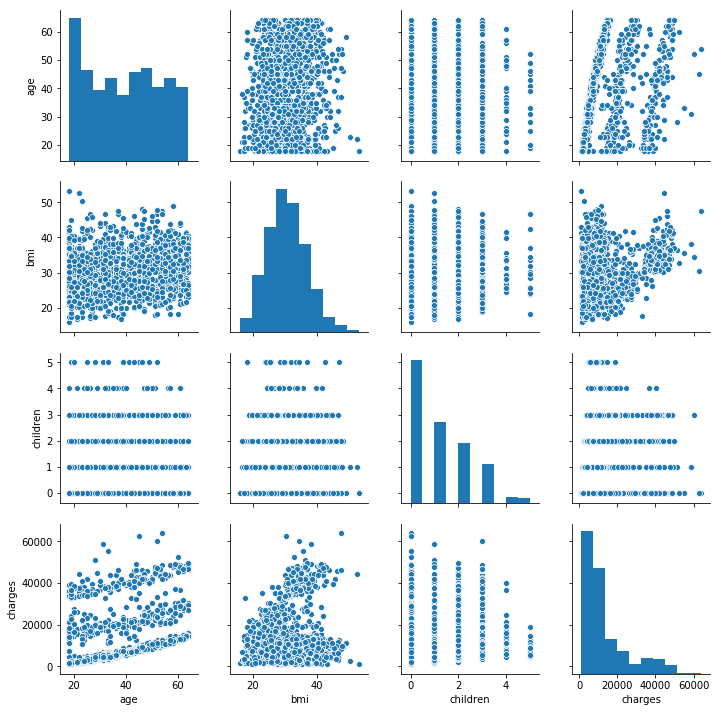

In [182]:
#Distribution and correlation
sns.pairplot(num_data)

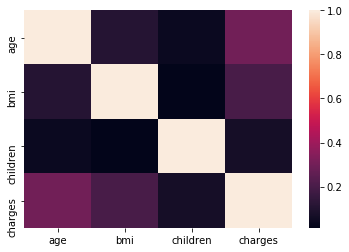

In [183]:
sns.heatmap(num_data.corr())

In [184]:
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


Text(0.5, 1.0, 'region value count')

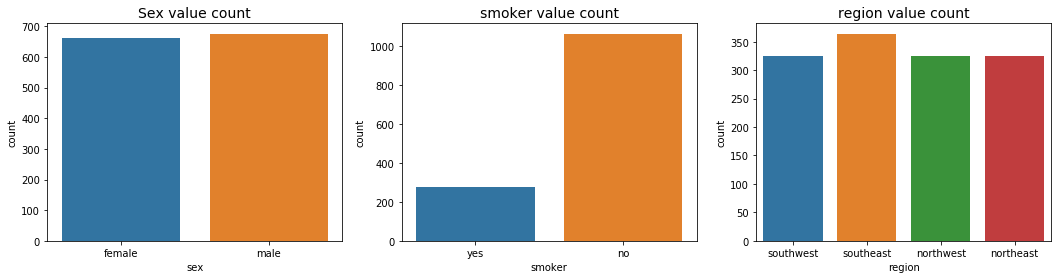

In [185]:
#cat features
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,4))
sns.countplot(data.sex,ax=ax1)
ax1.set_title('Sex value count', fontsize=14)

sns.countplot(data.smoker,ax=ax2)
ax2.set_title('smoker value count', fontsize=14)

sns.countplot(data.region,ax=ax3)
ax3.set_title('region value count', fontsize=14)

Text(0.5, 1.0, 'Distribution of charges for smokers and non smokers')

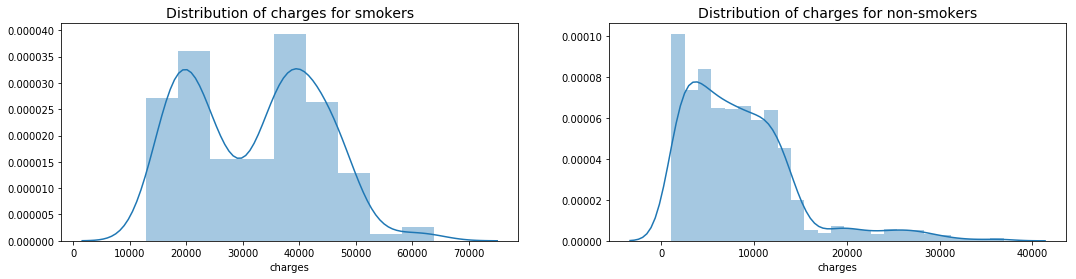

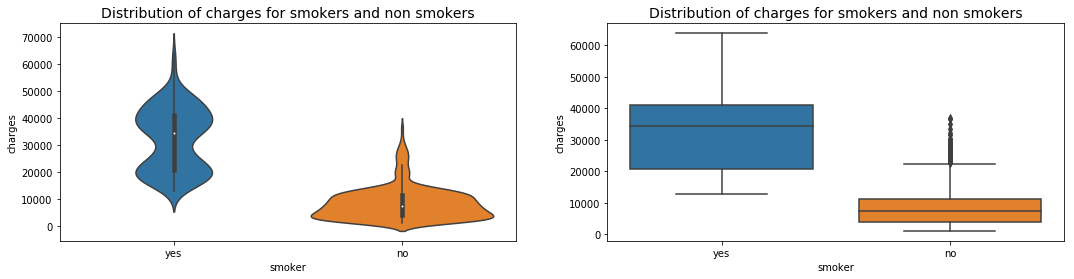

In [186]:
#Distribution of charges over smoker and non smoker
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.distplot(data[data['smoker']=='yes']['charges'],ax=ax1)
ax1.set_title('Distribution of charges for smokers', fontsize=14)


sns.distplot(data[data['smoker']=='no']['charges'],ax=ax2)
ax2.set_title('Distribution of charges for non-smokers', fontsize=14)


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.violinplot(x="smoker", y="charges", data=data,ax=ax1)
ax1.set_title('Distribution of charges for smokers and non smokers', fontsize=14)

sns.boxplot(x="smoker", y="charges", data=data,ax=ax2)
ax2.set_title('Distribution of charges for smokers and non smokers', fontsize=14)

Text(0.5, 1.0, 'Distribution of charges for male and female')

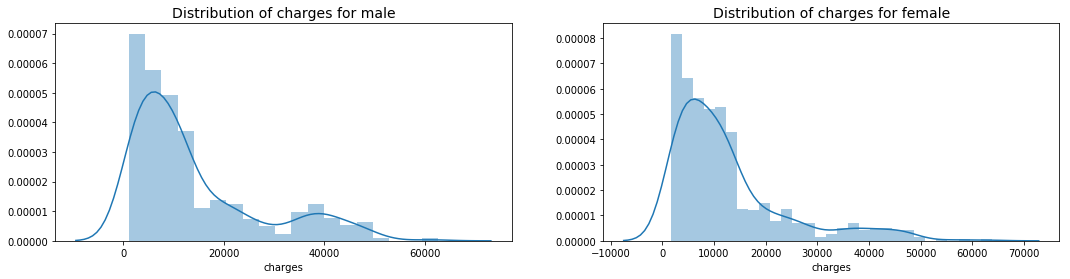

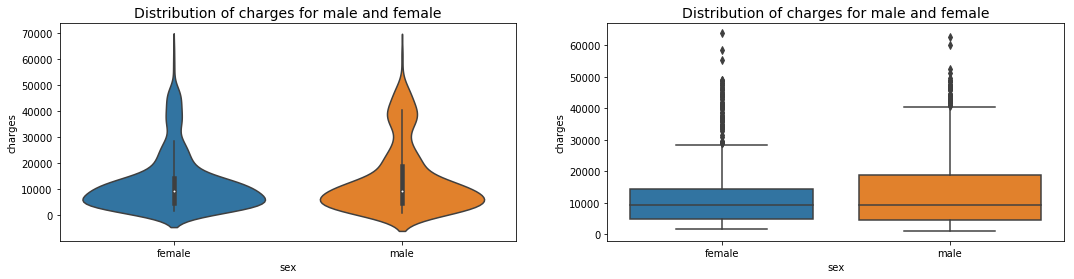

In [187]:
#Distribution of charges over male and female
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.distplot(data[data['sex']=='male']['charges'],ax=ax1)
ax1.set_title('Distribution of charges for male', fontsize=14)

sns.distplot(data[data['sex']=='female']['charges'],ax=ax2)
ax2.set_title('Distribution of charges for female', fontsize=14)


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.violinplot(x="sex", y="charges", data=data,ax=ax1)
ax1.set_title('Distribution of charges for male and female', fontsize=14)

sns.boxplot(x="sex", y="charges", data=data,ax=ax2)
ax2.set_title('Distribution of charges for male and female', fontsize=14)

Text(0.5, 1.0, 'Distribution of charges for male  and female over smokers and non snokers')

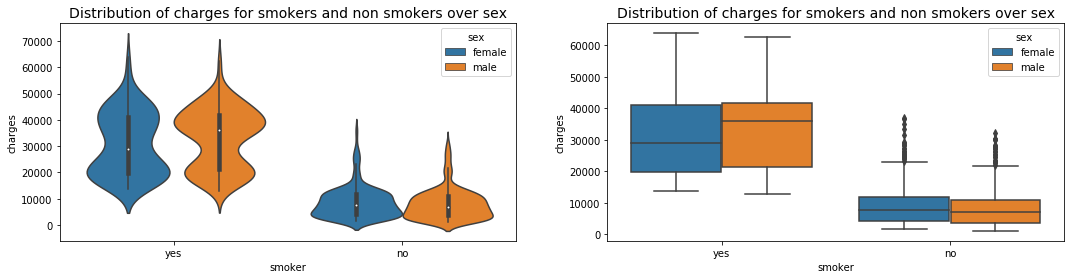

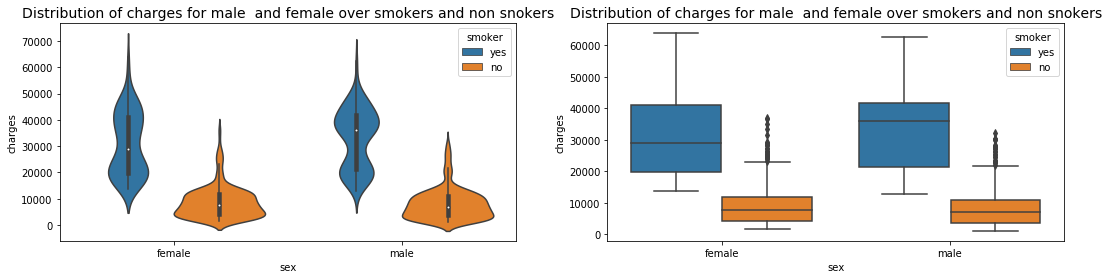

In [222]:
##Understanding relationship between 3 features
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.violinplot(x="smoker", y="charges", data=data,ax=ax1,hue='sex')
ax1.set_title('Distribution of charges for smokers and non smokers over sex', fontsize=14)

sns.boxplot(x="smoker", y="charges", data=data,ax=ax2,hue='sex')
ax2.set_title('Distribution of charges for smokers and non smokers over sex', fontsize=14)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,4))
sns.violinplot(x="sex", y="charges", data=data,ax=ax1,hue='smoker')
ax1.set_title('Distribution of charges for male  and female over smokers and non snokers', fontsize=14)

sns.boxplot(x="sex", y="charges", data=data,ax=ax2,hue='smoker')
ax2.set_title('Distribution of charges for male  and female over smokers and non snokers', fontsize=14)

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Smokers and non-smokers')

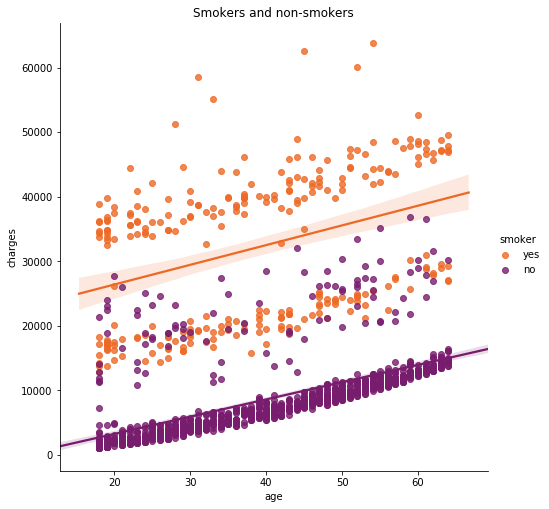

In [228]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'inferno_r', size = 7)
plt.title('Smokers and non-smokers')

In [205]:
#Scaling Data
scale=StandardScaler()
y=num_data['charges']
num_data=num_data.drop(columns=['charges'],axis=1)
num_data=pd.DataFrame(scale.fit_transform(X=num_data),columns=num_data.columns)
num_data.head()

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [0]:
#https://www.kaggle.com/jbucker/sklearn-multicollinearity-class-speedup
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            # Loop repeatedly until we find that all columns within our dataset
            # have a VIF value we're happy with.
            variables = X.columns
            dropped=False
            vif = []
            new_vif = 0
            for var in X.columns:
                new_vif = variance_inflation_factor(X[variables].values, X.columns.get_loc(var))
                vif.append(new_vif)
                if np.isinf(new_vif):
                    break
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X

In [113]:
#Multicollinearity
transformer = ReduceVIF()
num_data = transformer.fit_transform(num_data, y)
num_data.head()

ReduceVIF fit
ReduceVIF transform


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802


In [0]:
#Handing cat values
#One hot encoding
data=pd.concat([num_data,cat_data],axis=1)
data=pd.get_dummies(data)
X=data

#Targer Encodning

##Machine Learning

In [207]:
#splitting te data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
y_pre=linear_model.predict(X_test)
print(linear_model.score(X_test,y_test))

0.7710210178990672


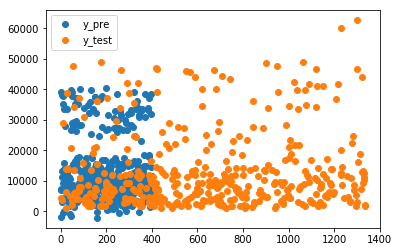

In [208]:
plt.plot(y_pre,lw=0,marker='o',label='y_pre')
plt.plot(y_test,lw=0,marker='o',label='y_test')
plt.legend()
plt.show()

##Linear Regression  Assumptions

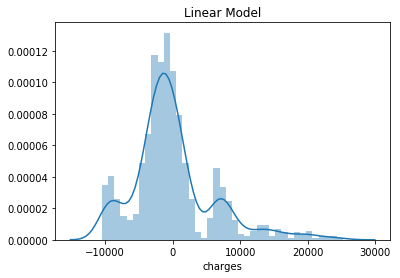

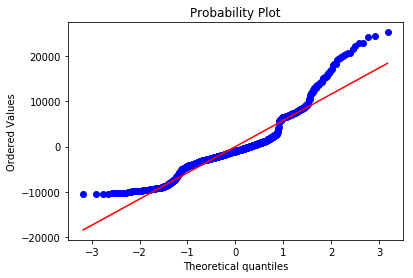

In [232]:
#ttps://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
#Error should be normally distributed

residuals_linear = y_train - linear_model.predict(X_train)
sns.distplot(residuals_linear);
plt.title('Linear Model')

plt.figure()
stats.probplot(residuals_linear, dist="norm", plot=pylab)
pylab.show()

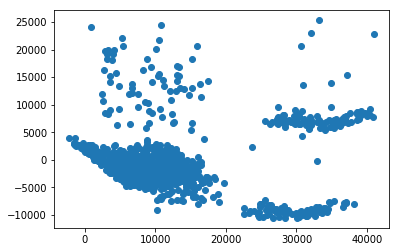

In [210]:
#Contant error variance(no heteroskedasticity) and Linearity
plt.scatter(linear_model.predict(X_train),residuals_linear,lw=1,marker='o')
plt.xlable('fitted value')
plt.xlable('residual value')
#1.If there exist any pattern (may be, a parabolic shape) in this plot, consider it as signs of non-linearity in the data. 
   #It means that the model doesn’t capture non-linear effects.
#2.If a funnel shape is evident in the plot, consider it as the signs of non constant variance i.e. heteroskedasticity.
#Solution: To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² 
#          transform the dependent variable. To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. 
#          Also, you can use weighted least square method to tackle heteroskedasticity.

###Model Evaluation

In [229]:
#Model Evaluation
print('MAE:', mean_absolute_error(y_test, y_pre))
print('MSE:', mean_squared_error(y_test, y_pre))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pre)))
print('R2:',r2_score(y_test, y_pre))

MAE: 4220.805232900528
MSE: 35769186.79209583
RMSE: 5980.734636488717
R2: 0.7710210178990672


In [234]:
#The results of the regression indicated the nine predictors explained 77.1% of the variance 
#R-squared will always increase as you add more features to the model, even if they are unrelated to the response
#Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.
#Solution:Adjusted R-squared
yhat = linear_model.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7406921972993092 0.7376051996481106
